In [1]:
video_file = 'C:\\Users\insan\\Desktop\\IR Camera Videos\\Day 9\\AE_231_1\\CogRig_AE_231_2023-02-14_1.mp4'

In [2]:
config_path = 'C:\\Users\insan\\Desktop\\DLC_Projects\\Training_nonmulti\\Training_project-TH-2023-03-03\\config.yaml'

In [3]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)

act_directory = 'C:\\Users\insan\\Desktop\\Camera_Cache'



In [4]:
animals_in_cache = []
EnumSession = []
EnumClust = []
EnumOnlySession = []

for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animals_in_cache.append(sessionfile.meta.animal)

    if not sessionfile.meta.region == 'AC':
        continue
    
    EnumOnlySession.append(session)
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)
        
        
animals_in_cache = np.unique(animals_in_cache)

100%|██████████| 2/2 [00:00<00:00, 128.12it/s]


In [5]:
sessionfile_D7 = ilep.loadSessionCached(act_directory,EnumOnlySession[0])
sessionfile_D9 = ilep.loadSessionCached(act_directory,EnumOnlySession[1])

In [6]:
#Classify NCR
#FRmod_baseline is from behavior animals
FRmod_baseline = 3.771183191473048
NCR_D7 = []
for clust in sessionfile_D7.clusters.good:
    if sessionfile_D7.responsiveness[clust]['all_trials'].FRmodulation < FRmod_baseline:
        NCR_D7.append(clust)
print(NCR_D7)

NCR_D9 = []
for clust in sessionfile_D9.clusters.good:
    if sessionfile_D9.responsiveness[clust]['all_trials'].FRmodulation < FRmod_baseline:
        NCR_D9.append(clust)
print(NCR_D9)



[2, 102, 103, 141, 175, 181, 239, 240, 254, 256, 259, 260, 289, 290, 291, 312, 369, 387, 419, 420, 429, 447, 451, 474, 502, 506]
[8, 33, 43, 44, 59, 92, 96]


In [7]:
import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt
import dlc2kinematics

C:\Users\insan\anaconda3\envs\Ephyanalysis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
dataname = 'C:\\Users\insan\\Desktop\\IR Camera Videos\\Day 9\\AE_231_1\\CogRig_AE_231_2023-02-14_1DLC_resnet50_Training_projectMar3shuffle1_500000_filtered.h5'
dataframe = pd.read_hdf(os.path.join(dataname))

In [9]:
dataframe

scorer    DLC_resnet50_Training_projectMar3shuffle1_500000              \
bodyparts                                              Ear               
coords                                                   x           y   
0                                               349.161499  314.654999   
1                                               349.447540  315.364502   
2                                               349.673492  315.364502   
3                                               349.687073  314.859833   
4                                               349.716675  314.835297   
...                                                    ...         ...   
52524                                           364.745605  313.886658   
52525                                           364.866516  313.622101   
52526                                           364.917877  313.550140   
52527                                           364.917877  306.836304   
52528                                           364.312531  303.224976   

scorer                                                               \
bodyparts                  Mouth                            Whisker   
coords    likelihood           x           y likelihood           x   
0           0.000785  241.977066  302.587158        1.0  227.419098   
1           0.000628  242.255829  303.318939        1.0  227.436081   
2           0.000792  242.715149  303.399963        1.0  227.597046   
3           0.000928  242.715149  303.399963        1.0  227.597046   
4           0.000612  242.969574  304.005310        1.0  227.765686   
...              ...         ...         ...        ...         ...   
52524       0.000557  242.485641  302.589600        1.0  227.817322   
52525       0.000854  242.743469  302.672668        1.0  227.817322   
52526       0.000623  242.743469  302.589600        1.0  227.817322   
52527       0.000479  242.743469  301.720551        1.0  227.699615   
52528       0.000574  242.196564  301.699951        1.0  227.666519   

scorer                                                               \
bodyparts                               Hand                          
coords              y likelihood           x           y likelihood   
0          261.029633        1.0  359.760620  311.821503   0.999997   
1          261.382477        1.0  359.760620  313.537842   1.000000   
2          261.773590        1.0  359.910645  313.537842   1.000000   
3          262.220795        1.0  360.427399  312.890472   1.000000   
4          262.329956        1.0  360.427399  312.890472   0.999998   
...               ...        ...         ...         ...        ...   
52524      261.225372        1.0  372.900909  307.698090   1.000000   
52525      261.351105        1.0  373.377411  307.672852   1.000000   
52526      261.368530        1.0  373.486115  307.394440   1.000000   
52527      261.368530        1.0  373.377411  307.214447   1.000000   
52528      261.225372        1.0  371.834991  306.424713   1.000000   

scorer                                        
bodyparts        Nose                         
coords              x           y likelihood  
0          183.189056  294.189636        1.0  
1          183.384888  294.189636        1.0  
2          183.384888  294.265656        1.0  
3          183.281860  294.265656        1.0  
4          183.279877  294.265656        1.0  
...               ...         ...        ...  
52524      183.117767  295.196075        1.0  
52525      183.834747  295.337646        1.0  
52526      183.939545  295.364716        1.0  
52527      183.834747  295.364716        1.0  
52528      182.775314  295.337646        1.0  

[52529 rows x 15 columns]

In [10]:
type(dataframe.columns.names[0])

str

In [11]:
#Focus on Mouth and Hand
df_Mouth = dataframe.iloc[:,3:5]
df_Hand = dataframe.iloc[:,9:11]

In [12]:
df_Hand

scorer    DLC_resnet50_Training_projectMar3shuffle1_500000            
bodyparts                                             Hand            
coords                                                   x           y
0                                               359.760620  311.821503
1                                               359.760620  313.537842
2                                               359.910645  313.537842
3                                               360.427399  312.890472
4                                               360.427399  312.890472
...                                                    ...         ...
52524                                           372.900909  307.698090
52525                                           373.377411  307.672852
52526                                           373.486115  307.394440
52527                                           373.377411  307.214447
52528                                           371.834991  306.424713

[52529 rows x 2 columns]

In [13]:
df_Mouth

scorer    DLC_resnet50_Training_projectMar3shuffle1_500000            
bodyparts                                            Mouth            
coords                                                   x           y
0                                               241.977066  302.587158
1                                               242.255829  303.318939
2                                               242.715149  303.399963
3                                               242.715149  303.399963
4                                               242.969574  304.005310
...                                                    ...         ...
52524                                           242.485641  302.589600
52525                                           242.743469  302.672668
52526                                           242.743469  302.589600
52527                                           242.743469  301.720551
52528                                           242.196564  301.699951

[52529 rows x 2 columns]

In [14]:
df, bodyparts, scorer = dlc2kinematics.load_data(dataname)

In [15]:
#compute velocity = pos2-pos1/dt
df_vel = dlc2kinematics.compute_velocity(df,bodyparts=['all'])

In [16]:
df_vel

scorer    DLC_resnet50_Training_projectMar3shuffle1_500000            \
bodyparts                                              Ear             
coords                                                   x         y   
0                                                 0.255997  0.354752   
1                                                 0.255997  0.354752   
2                                                 0.119766 -0.252335   
3                                                 0.021591 -0.264603   
4                                                 0.070831  0.000000   
...                                                    ...       ...   
52524                                             0.060455 -0.067810   
52525                                             0.086136 -0.168259   
52526                                             0.025681 -3.392899   
52527                                            -0.302673 -5.162582   
52528                                            -0.302673 -5.162582   

scorer                                                                   \
bodyparts                Mouth                        Whisker             
coords    likelihood         x         y likelihood         x         y   
0           0.000785  0.369041  0.406403        1.0  0.088974  0.371979   
1           0.000628  0.369041  0.406403        1.0  0.088974  0.371979   
2           0.000792  0.229660  0.040512        1.0  0.080482  0.419159   
3           0.000928  0.127213  0.302673        1.0  0.084320  0.278183   
4           0.000612  0.127213  0.322311        1.0  0.084320  0.054581   
...              ...       ...       ...        ...       ...       ...   
52524       0.000557  0.128914  0.000000        1.0  0.024223  0.068634   
52525       0.000854  0.128914  0.000000        1.0  0.000000  0.071579   
52526       0.000623  0.000000 -0.476059        1.0 -0.058853  0.008713   
52527       0.000479 -0.273453 -0.444824        1.0 -0.075401 -0.071579   
52528       0.000574 -0.273453 -0.444824        1.0 -0.075401 -0.071579   

scorer                                                                   \
bodyparts                 Hand                           Nose             
coords    likelihood         x         y likelihood         x         y   
0                1.0  0.075012  0.858170   0.999997  0.097916  0.038010   
1                1.0  0.075012  0.858170   1.000000  0.097916  0.038010   
2                1.0  0.333389 -0.323685   1.000000 -0.051514  0.038010   
3                1.0  0.258377 -0.323685   1.000000 -0.052505  0.000000   
4                1.0  0.000000  0.467514   0.999998 -0.000992 -0.038940   
...              ...       ...       ...        ...       ...       ...   
52524            1.0  0.110809 -0.137787   1.000000  0.293137  0.070786   
52525            1.0  0.292603 -0.151825   1.000000  0.410889  0.084320   
52526            1.0  0.000000 -0.229202   1.000000  0.000000  0.013535   
52527            1.0 -0.825562 -0.484863   1.000000 -0.582115 -0.013535   
52528            1.0 -0.825562 -0.484863   1.000000 -0.582115 -0.013535   

scorer                
bodyparts             
coords    likelihood  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0  
...              ...  
52524            1.0  
52525            1.0  
52526            1.0  
52527            1.0  
52528            1.0  

[52529 rows x 15 columns]

In [17]:
#compute acceleration v2-v1/dt
#df_acc = dlc2kinematics.compute_acceleration(df,bodyparts=['all'])

In [18]:
#match video recording time with the neural recording time
timefile=np.load('C:\\Users\insan\\Desktop\\IR Camera Videos\\Day 9\\AE_231_1\\TIMESTAMPS_CogRig_AE_231_2023-02-14_1.npy')
#camera video frame match from the camera video timestamp
len(timefile)

import datetime
video_timestamp = []
for unix_time in timefile:
    time = datetime.datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')
    video_timestamp.append(time)

#neural recording start time: 4:21:43 PM

In [19]:
video_timestamp[4]

'2023-02-14 16:21:43'

In [20]:
#Classify NCR_D9
#FRmod_baseline is from behavior animals
FRmod_baseline = 3.771183191473048

NCR_D9 = []
NCR_D9_label = []
for clust in sessionfile_D9.clusters.good:
    if sessionfile_D9.responsiveness[clust]['all_trials'].FRmodulation < FRmod_baseline:
        NCR_D9.append(clust)
        NCR_D9_label.append(str(clust))
print(NCR_D9)
print(NCR_D9_label)

[8, 33, 43, 44, 59, 92, 96]
['8', '33', '43', '44', '59', '92', '96']


In [21]:
##########################analysis start for window1

In [22]:
def getSpikeTimes_window(window_frame,start_idx,neural_start):
    #convert the end of window into samples
    start_frame = timefile[start_idx]
    end_frame = timefile[start_idx+window_frame-1]
    window_seconds = end_frame - start_frame
    #print(window_seconds)

    window_samples = 30000*window_seconds
    #print(window_samples)
    
    #get spike time in seconds in the window
    neural_end = neural_start + window_samples
    spike_times = []
    for clust in NCR_D9:
        spike_time = ilep.getSpikeTimes(sessionfile_D9,clust=clust, starttime = neural_start, endtime=neural_end)
        spike_times.append(spike_time)
    spike_times_seconds = np.array(spike_times)
    spike_times_seconds = spike_times_seconds/30000
    #print(spike_times_seconds)
    return(spike_times_seconds)

C:\Users\insan\AppData\Local\Temp\ipykernel_5172\2316190943.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times_seconds = np.array(spike_times)


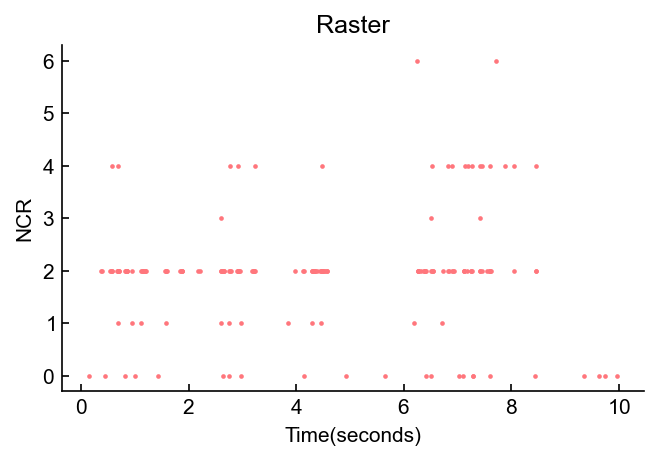

In [35]:
###############window one analysis: starting from frame3, video around 0-10seconds
window1_frame = 1000
start_idx_window1 = 3
neural_start_time_window1=0

#Plot NCR Raster for window1
spike_times_seconds_window1 = getSpikeTimes_window(window1_frame,start_idx_window1,neural_start_time_window1)
FRmod = sessionfile_D9.responsiveness[clust]['all_trials'].FRmodulation
FRmod_color = NCR_CR_cmap( (FRmod-1)/5)

size=10
fig = plt.figure(figsize=(5,3))
ax1 = plt.subplot()
for neuron,spike_time in enumerate(spike_times_seconds_window1):
    ax1.scatter(spike_time,np.ones_like(spike_time)*neuron,color=FRmod_color,s=5,marker='o',lw=0)
ax1.set_title('Raster')
ax1.set_xlabel('Time(seconds)')
ax1.set_ylabel('NCR')
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figures\\Motion','NCR_D9_Raster_window1.png'),transparent=False,facecolor="white")


In [37]:
spike_times_seconds_window1

array([array([0.14043333, 0.44576667, 0.81763333, 1.00193333, 1.4341    ,
              2.6388    , 2.7558    , 2.97666667, 4.13746667, 4.9229    ,
              5.6572    , 6.40606667, 6.51186667, 7.03263333, 7.1067    ,
              7.2783    , 7.28936667, 7.6067    , 8.44776667, 9.34256667,
              9.63673333, 9.73816667, 9.96643333])                       ,
       array([0.69196667, 0.94973333, 1.11276667, 1.58576667, 2.60536667,
              2.7513    , 2.98163333, 3.84863333, 4.28756667, 4.46576667,
              6.1893    , 6.7114    ])                                   ,
       array([0.361     , 0.39593333, 0.545     , 0.56346667, 0.5694    ,
              0.5816    , 0.67353333, 0.6764    , 0.68686667, 0.6906    ,
              0.7054    , 0.71066667, 0.81666667, 0.8279    , 0.83146667,
              0.83373333, 0.84613333, 0.84893333, 0.85793333, 0.94063333,
              1.10626667, 1.12393333, 1.144     , 1.15283333, 1.1785    ,
              1.18686667, 1.20163333

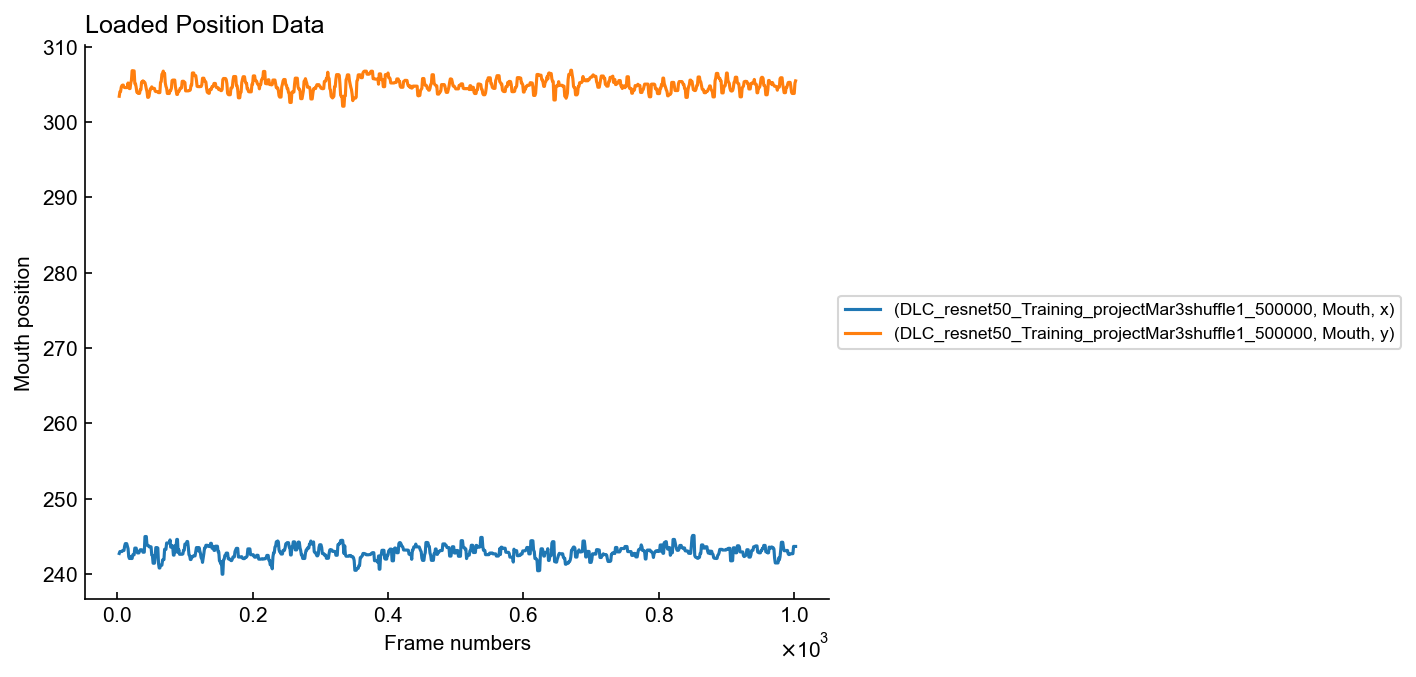

In [36]:
#plot mouth position
ax1 = df_Mouth[start_idx_window1:start_idx_window1+window1_frame].plot(kind="line")
plt.xlabel("Frame numbers")
plt.ylabel("Mouth position")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
plt.title("Loaded Position Data", loc="left")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

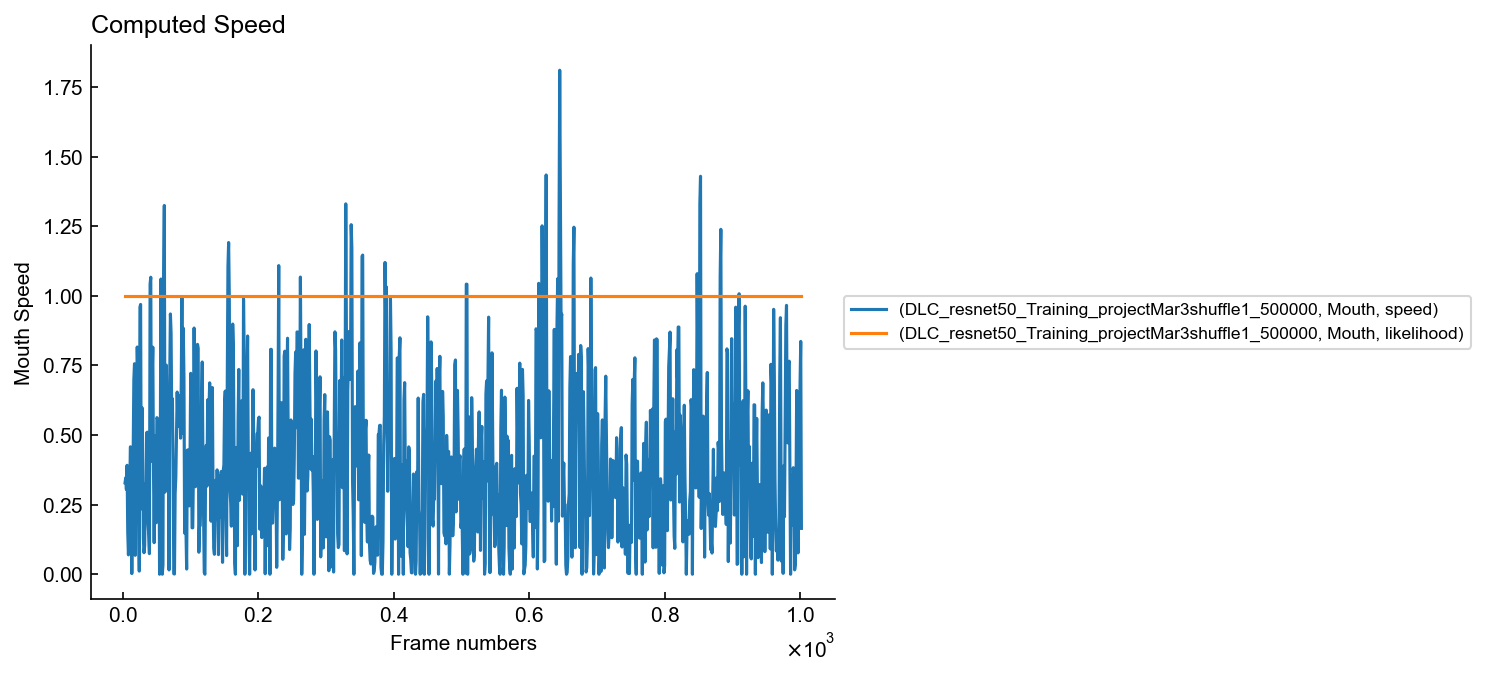

In [25]:
df_speed_Mouth = dlc2kinematics.compute_speed(df,bodyparts=['Mouth'])
mouth_speed_avg = df_speed_Mouth.iloc[:,0].mean()
#plot mouth speed for the window
ax = df_speed_Mouth[start_idx_window1:start_idx_window1+window1_frame].plot(kind="line")
plt.xlabel("Frame numbers")
plt.ylabel("Mouth Speed")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.title("Computed Speed", loc="left")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

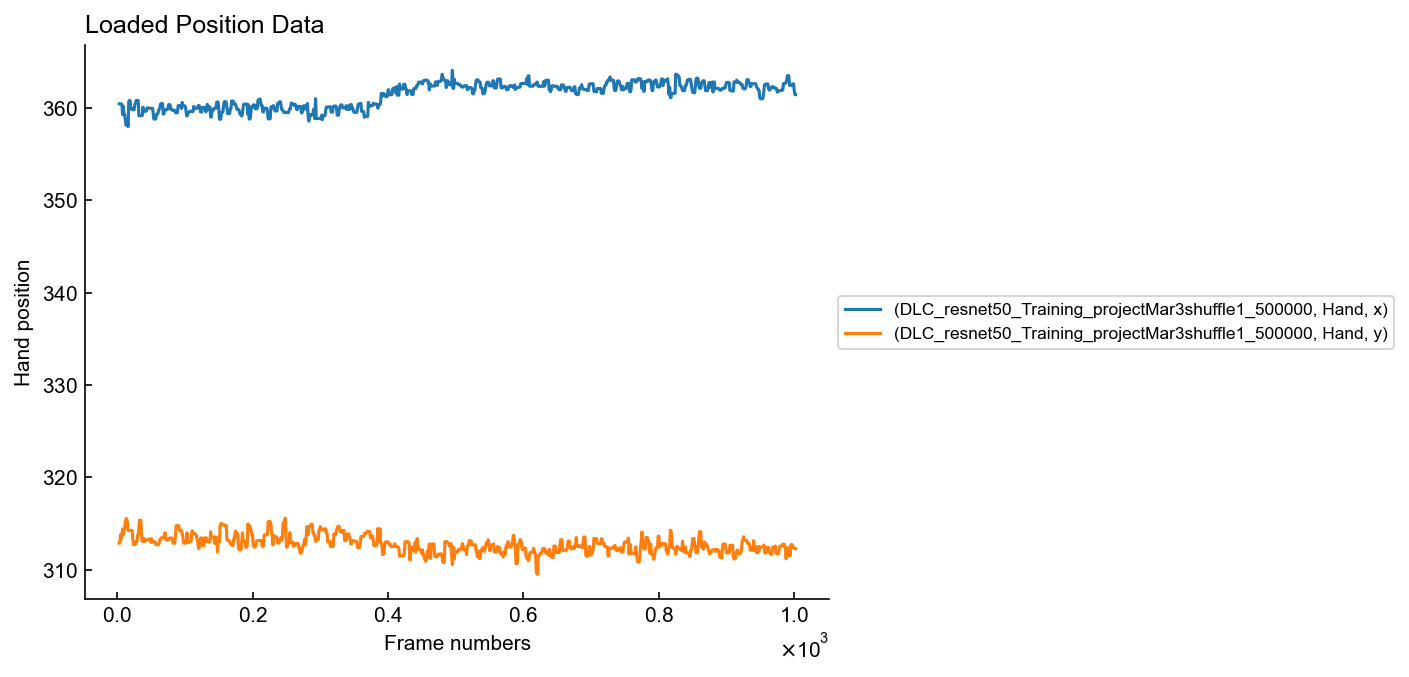

In [26]:
#plot hand position
ax1 = df_Hand[start_idx_window1:start_idx_window1+window1_frame].plot(kind="line")
plt.xlabel("Frame numbers")
plt.ylabel("Hand position")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
plt.title("Loaded Position Data", loc="left")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

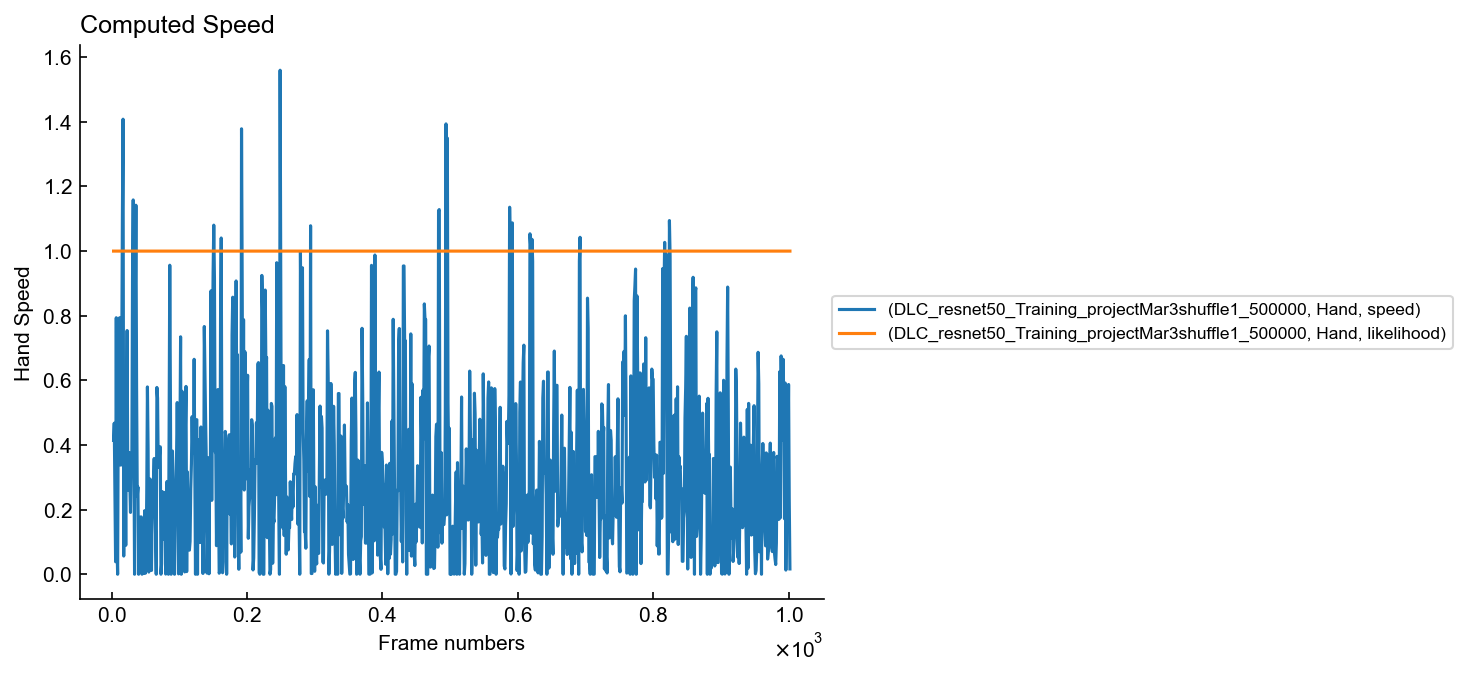

In [27]:
df_speed_Hand = dlc2kinematics.compute_speed(df,bodyparts=['Hand'])
hand_speed_avg = df_speed_Hand.iloc[:,0].mean()
#plot hand speed for the window
ax = df_speed_Hand[start_idx_window1:start_idx_window1+window1_frame].plot(kind="line")
plt.xlabel("Frame numbers")
plt.ylabel("Hand Speed")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.title("Computed Speed", loc="left")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

C:\Users\insan\AppData\Local\Temp\ipykernel_5172\2316190943.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times_seconds = np.array(spike_times)


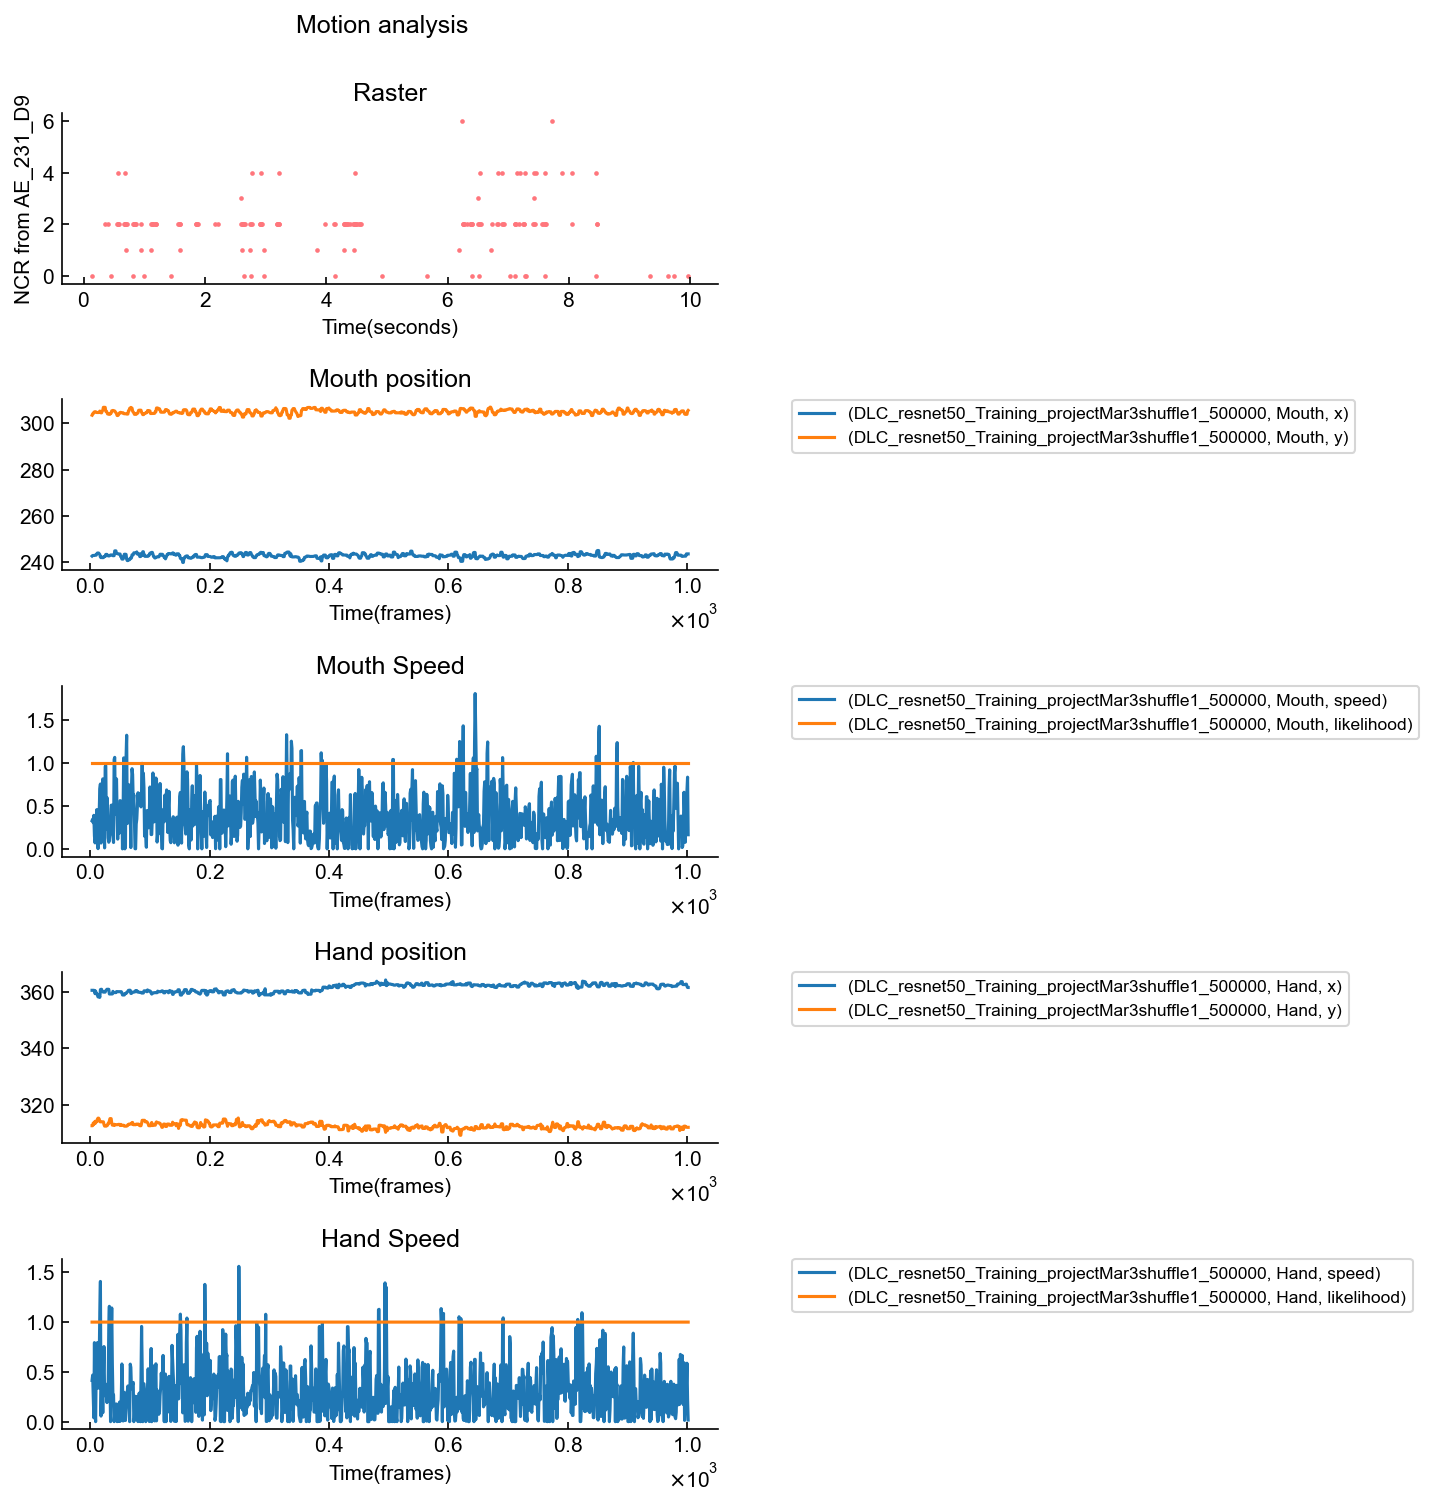

In [28]:
#Plots together for window1
FRmod = sessionfile_D9.responsiveness[clust]['all_trials'].FRmodulation
FRmod_color = NCR_CR_cmap( (FRmod-1)/5)

size=20
fig,ax = plt.subplots(5,1,figsize=(10,10), sharex=False,sharey=False)
fig.suptitle('Motion analysis',x=0.26,y=1)

#Plot NCR Raster for window1
spike_times_seconds_window1 = getSpikeTimes_window(window1_frame,start_idx_window1,neural_start_time_window1)
for neuron,spike_time in enumerate(spike_times_seconds_window1):
    ax[0].scatter(spike_time,np.ones_like(spike_time)*neuron,color=FRmod_color,s=5,marker='o',lw=0)
ax[0].set_title('Raster')
ax[0].set_xlabel('Time(seconds)')
ax[0].set_ylabel('NCR from AE_231_D9')

#Mouth position
df_Mouth[start_idx_window1:start_idx_window1+window1_frame].plot(ax=ax[1])
ax[1].set_title('Mouth position')
ax[1].set_xlabel('Time(frames)')
ax[1].legend(bbox_to_anchor=(1.1, 1.05))

#Mouth speed
df_speed_Mouth[start_idx_window1:start_idx_window1+window1_frame].plot(ax=ax[2])
ax[2].set_title('Mouth Speed')
ax[2].set_xlabel('Time(frames)')
ax[2].legend(bbox_to_anchor=(1.1, 1.05))

#Hand position
df_Hand[start_idx_window1:start_idx_window1+window1_frame].plot(kind="line", ax=ax[3])
ax[3].set_title('Hand position')
ax[3].set_xlabel('Time(frames)')
ax[3].legend(bbox_to_anchor=(1.1, 1.05))

#Hand speed
df_speed_Hand[start_idx_window1:start_idx_window1+window1_frame].plot(ax=ax[4])
ax[4].set_title('Hand Speed')
ax[4].set_xlabel('Time(frames)')
ax[4].legend(bbox_to_anchor=(1.1, 1.05))

fig.tight_layout()
plt.show()
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figures\\Motion','Motion analysis for window1.png'),transparent=False,facecolor="white")
    

In [29]:
timefile_window1 = timefile[start_idx_window1:start_idx_window1+window1_frame]
timefile_window1_arr = np.array(timefile_window1)
timefile_window1_arr = timefile_window1_arr-timefile_window1_arr[0]

In [30]:
mouth_speed_window1 = df_speed_Mouth[start_idx_window1:start_idx_window1+window1_frame].iloc[:,0]
mouth_speed_window1_arr = pd.DataFrame(mouth_speed_window1).to_numpy()

In [31]:
hand_speed_window1 = df_speed_Hand[start_idx_window1:start_idx_window1+window1_frame].iloc[:,0]
hand_speed_window1_arr = pd.DataFrame(hand_speed_window1).to_numpy()

In [32]:
# plt.scatter(timefile_window1_arr,mouth_speed_window1_arr,s=0.2)

# for spiketime in spike_times_seconds_window1[0]:
#     plt.axvline(x = spiketime, color = 'pink',linewidth=0.5)
# plt.axhline(y = mouth_speed_avg, color ="green", linestyle ="--")

# plt.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figures\\Motion','Mouth speed window1.png'),transparent=False,facecolor="white")

In [33]:
# plt.scatter(timefile_window1_arr,hand_speed_window1_arr,s=0.2)

# for spiketime in spike_times_seconds_window1[0]:
#     plt.axvline(x = spiketime, color = 'pink',linewidth=0.5)
# plt.axhline(y =hand_speed_avg, color ="green", linestyle ="--")
# plt.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figures\\Motion','Hand speed window1.png'),transparent=False,facecolor="white")

C:\Users\insan\AppData\Local\Temp\ipykernel_5172\2316190943.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times_seconds = np.array(spike_times)


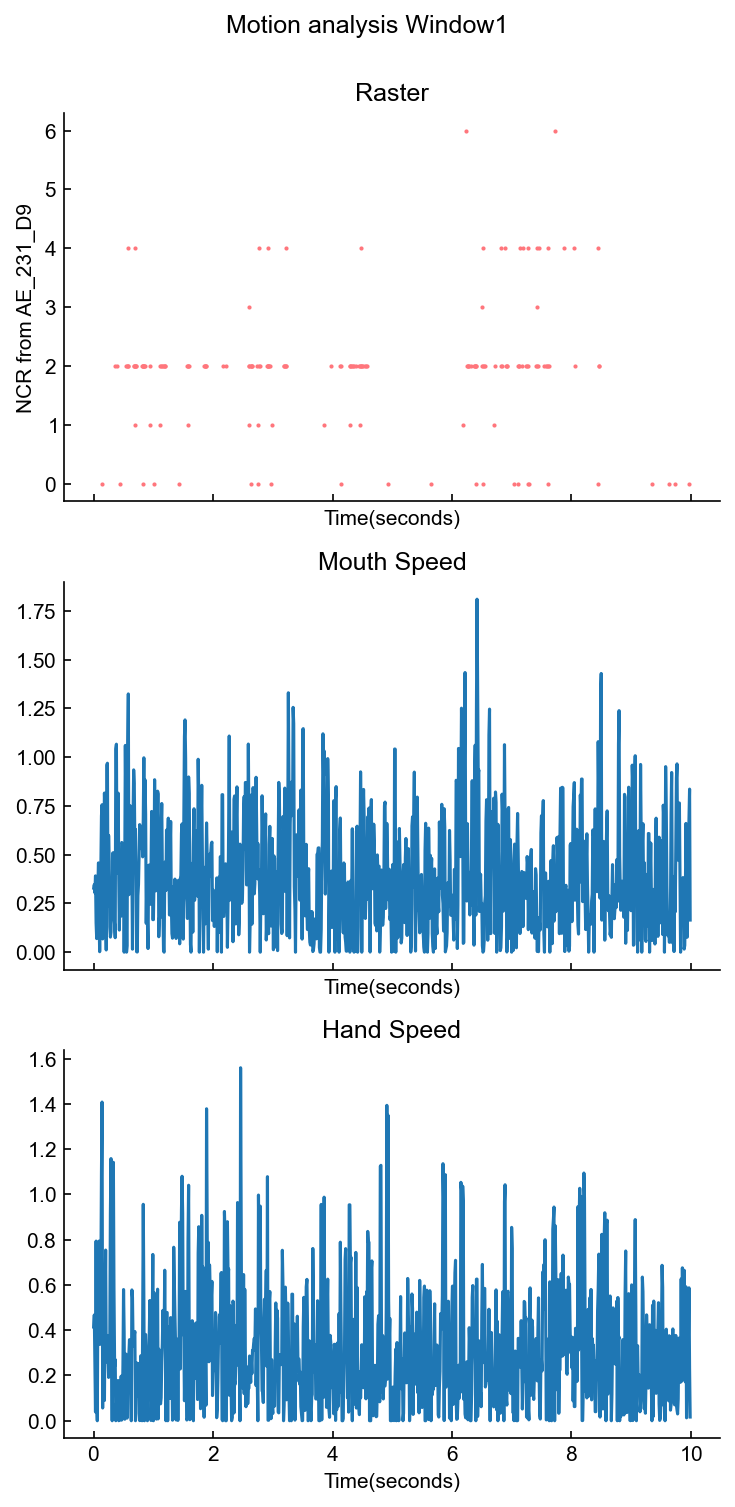

In [34]:
#Plots together for window1
FRmod = sessionfile_D9.responsiveness[clust]['all_trials'].FRmodulation
FRmod_color = NCR_CR_cmap( (FRmod-1)/5)

size=10
fig,ax = plt.subplots(3,1,figsize=(5,10), sharex=True,sharey=False)
fig.suptitle('Motion analysis Window1',x=0.5,y=1)

#Plot NCR Raster for window1
spike_times_seconds_window1 = getSpikeTimes_window(window1_frame,start_idx_window1,neural_start_time_window1)
for neuron,spike_time in enumerate(spike_times_seconds_window1):
    ax[0].scatter(spike_time,np.ones_like(spike_time)*neuron,color=FRmod_color,s=4,marker='o',lw=0)
ax[0].set_title('Raster')
ax[0].set_xlabel('Time(seconds)')
ax[0].set_ylabel('NCR from AE_231_D9')

#Mouth speed
ax[1].plot(timefile_window1_arr,mouth_speed_window1_arr)
ax[1].set_title('Mouth Speed')
ax[1].set_xlabel('Time(seconds)')

#Hand speed
ax[2].plot(timefile_window1_arr,hand_speed_window1_arr)
ax[2].set_title('Hand Speed')
ax[2].set_xlabel('Time(seconds)')

fig.tight_layout()
plt.show()
fig.savefig(os.path.join('C:\\Users\insan\\Desktop\\Figures\\Motion','Motion analysis for window1 copy.png'),transparent=False,facecolor="white")